# Description

This project aims to classify stellar objects such as stars, galaxies and quasars. My analysis is based on an extensive dataset containing information about various characteristics of stellar objects.

**Dataset Description:**

**Number of Records:** 100,000
**Number of Features:** 18
**Types of Features:** Numerical (float64, int64) and Categorical (object)

**The dataset includes the following features:**

**obj_ID:** Object Identifier
**alpha, delta:** Object Coordinates
**u, g, r, i, z:** Brightness values in different ranges
**run_ID, rerun_ID, cam_col, field_ID:** Identification numbers
**spec_obj_ID:** Special Object Identifier
**class:** Object Class (galaxy, quasar, or star)
**redshift:** Redshift
**plate:** Plate Identification Number for spectral analysis
**MJD:** Modified Julian Date for temporal marking of spectra
**fiber_ID:** Fiber Identification Number for spectral analysis

My goal is to develop a machine learning model capable of automatically classifying stellar objects based on their characteristics. I plan to use machine learning algorithms such as Random Forest to train the model on this dataset.

I begin with data analysis, including visualization of the distribution of object classes, exploration of correlations between features, and data preparation for model training. Then, I use the SMOTE technique to balance the classes and train a Random Forest model for object classification. Finally, I evaluate the performance of the model using accuracy metrics, confusion matrices, and ROC curves.

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve 
from collections import Counter

# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')
df.shape

(100000, 18)

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
print(df['class'].unique())

['GALAXY' 'QSO' 'STAR']


In [9]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

# Data Visualization

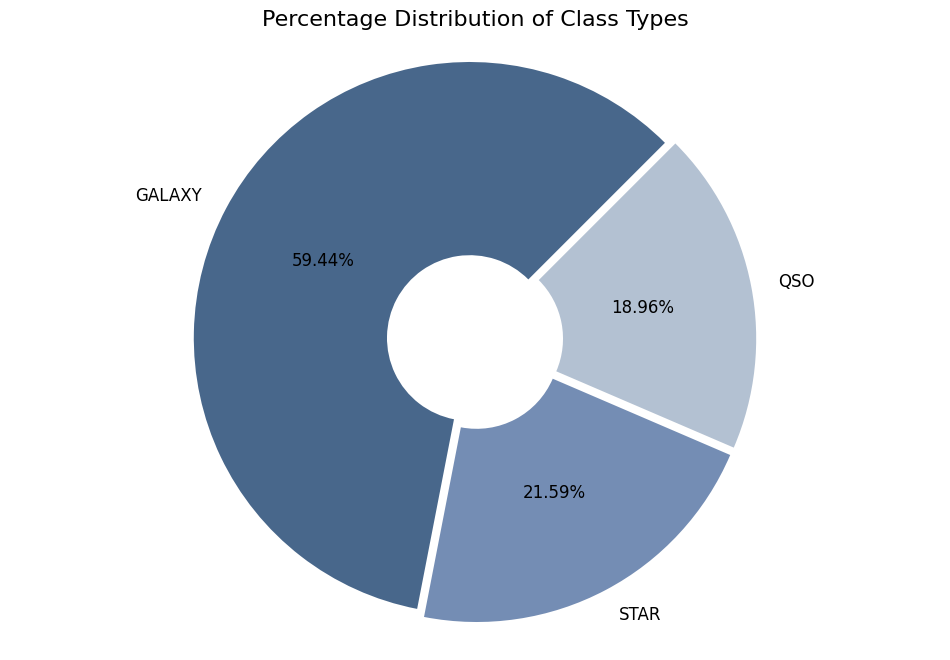

In [10]:
class_counts = df['class'].value_counts()

colors = ['#48678b', '#748db4', '#b3c1d2']  
explode = (0.015, 0.025, 0.025)  

plt.figure(figsize = (12, 8))
plt.pie(class_counts, autopct = '%1.2f%%',
        startangle = 45, labels = class_counts.index, colors = colors, explode = explode, textprops = {'fontname': 'Times New Roman', 'fontsize': 12},
       wedgeprops=dict(width=0.7))
plt.title('Percentage Distribution of Class Types', fontsize = 16, fontname = 'Times New Roman')
plt.axis('equal')
plt.show()

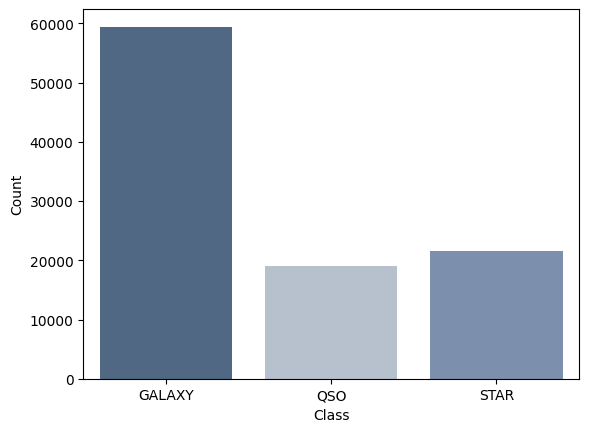

In [11]:
colors = ['#48678b', '#b3c1d2', '#748db4'] 
sns.countplot(data = df, x = 'class', palette = colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

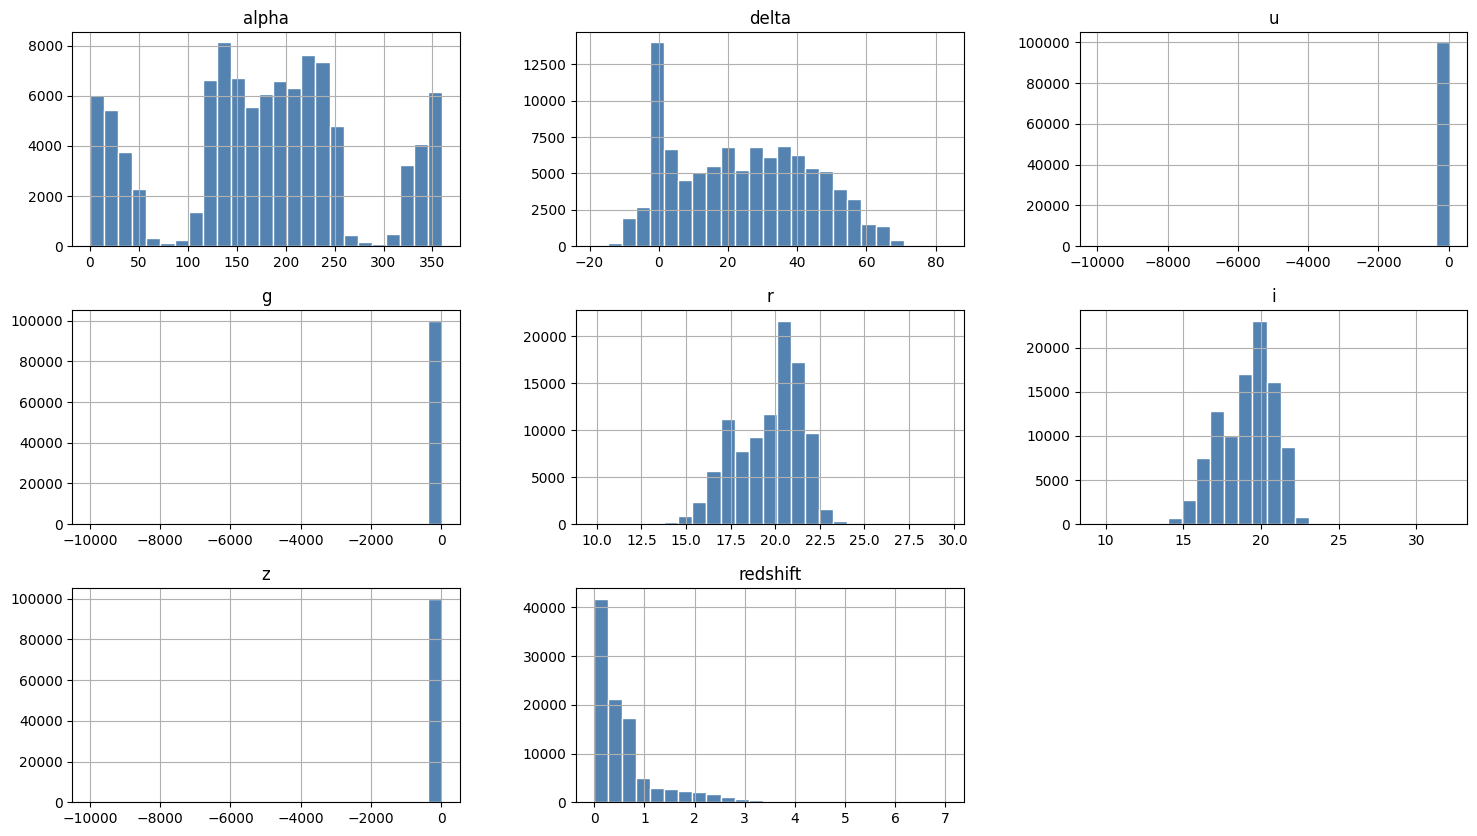

In [12]:
columns_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'fiber_ID', 'plate', 'MJD']
df_hist = df.drop(columns_to_drop, axis = 1)

df_hist.hist(bins = 25, figsize = (18,10), color = '#5483b1', edgecolor = 'white')
plt.show()

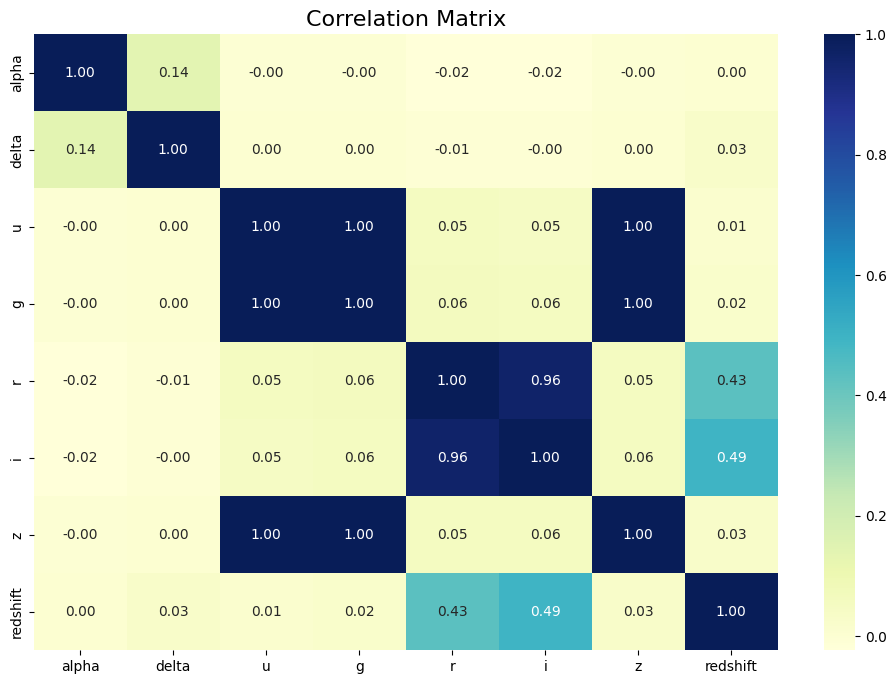

In [13]:
df_heatmap = df.drop(columns_to_drop, axis=1)

plt.figure(figsize = (12, 8))
df_heatmap_corr = df_heatmap.corr()
sns.heatmap(df_heatmap_corr, annot = True, fmt = '.2f', cmap ='YlGnBu')
plt.title('Correlation Matrix', fontsize = 16)
plt.show()

# Encoding, Resampling and Scaling Data

Due to the class imbalance in our dataset, we need to perform Resampling for balancing as well as Encoding because the values in the "class" column are not represented numerically.

In [14]:
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [15]:
X = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID', 'spec_obj_ID', 'MJD', 'class'], axis = 1)
y = df['class']

In [16]:
sm = SMOTE(random_state = 30, k_neighbors = 5)
X, y = sm.fit_resample(X, y)

In [17]:
y.value_counts()

class
0    59445
1    59445
2    59445
Name: count, dtype: int64

Additionally, we need to perform data standardization, as it will help us balance the scales of features and facilitate model interpretation.

In [18]:
st_x = StandardScaler()
st_x.fit(X)
X = st_x.transform(X)

# Splitting Dataset into Train/Test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

# Random Forest Classifier

Here, we are creating a dataframe to store the results of Random Forest for 20 neighbors. We will sort them and observe at which number of neighbors the highest score is achieved. Additionally, we will display the top 5 best results.

In [20]:
rforest_top = pd.DataFrame(columns = ['Neighbors','Test Accuracies'])

for i in range(1, 21):
    rforest = RandomForestClassifier(n_estimators = i, random_state = 42)
    rforest.fit(X_train, y_train)
    accuracy = rforest.score(X_test, y_test)
    rforest_top.loc[len(rforest_top)] = [i, accuracy]

rforest_top.sort_values(by = 'Test Accuracies', ascending = False).head().reset_index(drop = True)

,Neighbors,Test Accuracies
0,20.0,0.981406
1,19.0,0.981137
2,18.0,0.981137
3,17.0,0.981137
4,16.0,0.981092


As observed, the optimal outcome is achieved with 17 neighbors, although the other values are relatively close. Regardless, we will continue to utilize 17 neighbors in our subsequent analysis.

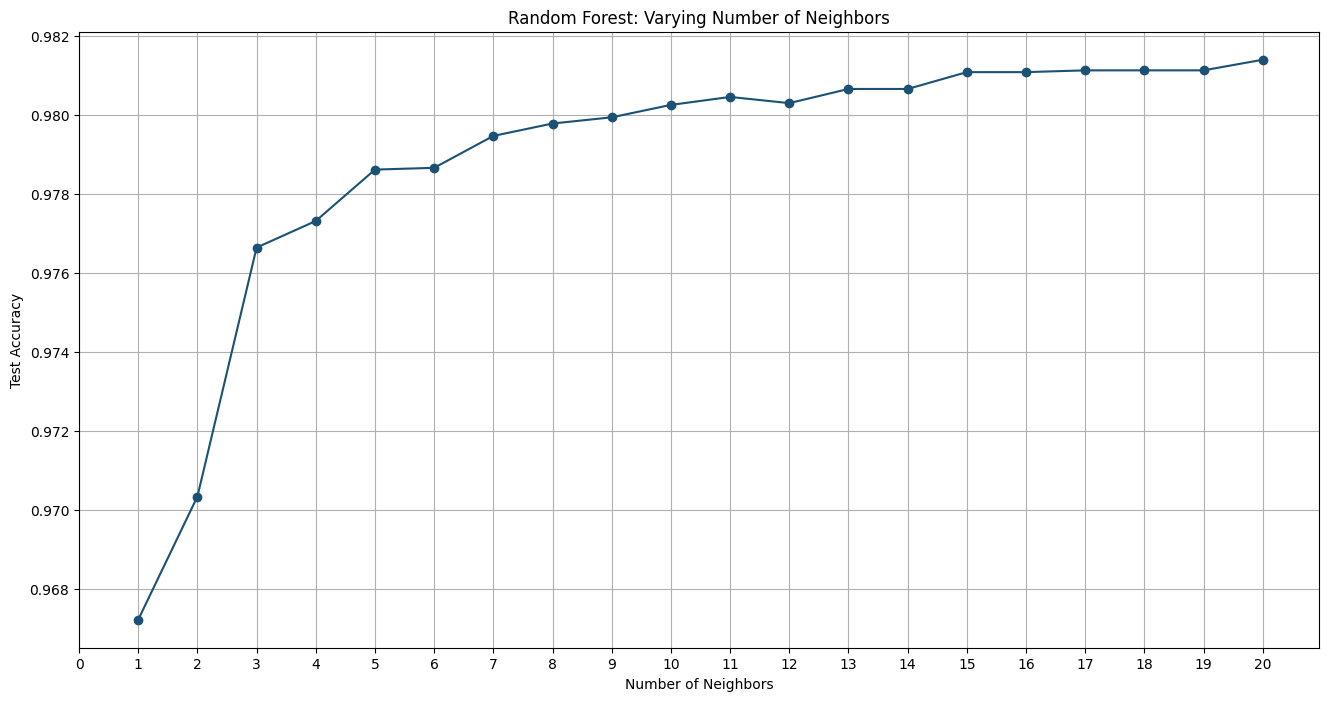

In [21]:
plt.figure(figsize = (16, 8))
plt.plot(rforest_top['Neighbors'], rforest_top['Test Accuracies'], marker = 'o', color = '#1a5174')
plt.title('Random Forest: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(rotation = 0, ticks = range(0, 21, 1))
plt.grid(True)
plt.show()

A graph serves as a good tool for comprehending the fluctuations in scores relative to the number of neighbors.

In [22]:
rforest = RandomForestClassifier(n_estimators = 17, random_state = 30)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.982


**Confusion Matrix**

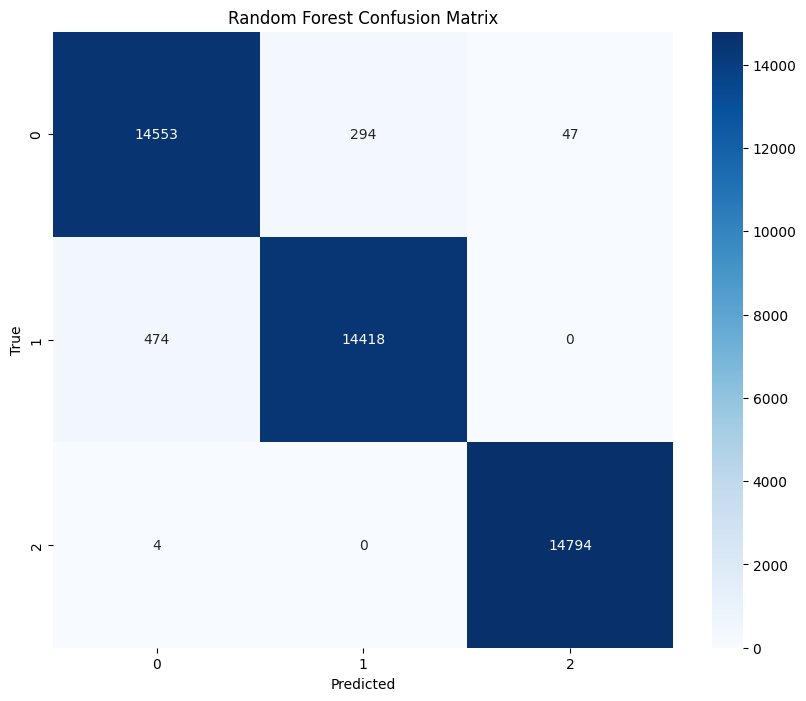

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'Blues', xticklabels = sorted(y_test.unique()),
            yticklabels = sorted(y_test.unique()))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix helps to visually demonstrate how well our classification model is performing. It shows how many objects were correctly or incorrectly classified compared to their actual labels.

**Classification Report**

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14894
           1       0.98      0.97      0.97     14892
           2       1.00      1.00      1.00     14798

    accuracy                           0.98     44584
   macro avg       0.98      0.98      0.98     44584
weighted avg       0.98      0.98      0.98     44584



**ROC Curve and AUC Score**

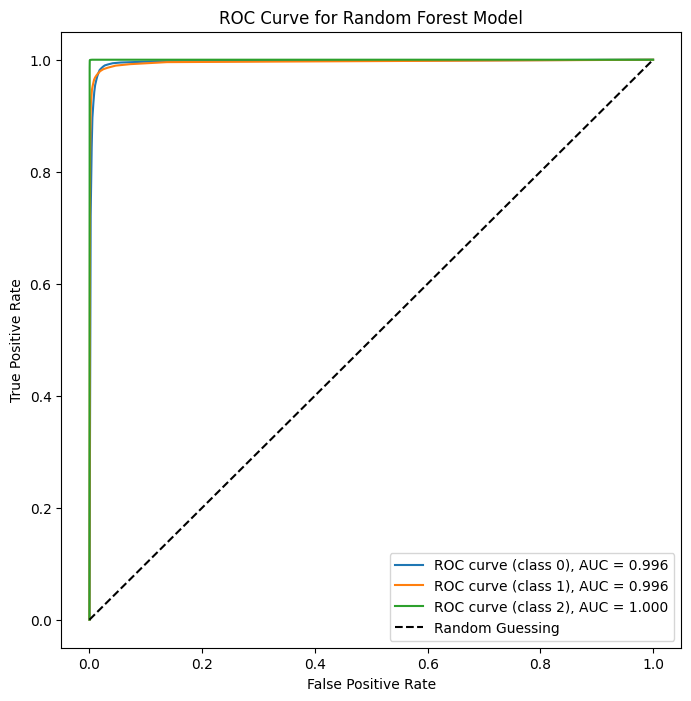

In [25]:
y_prob = rforest.predict_proba(X_test)
n_classes = len(rforest.classes_)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label = f'ROC curve (class {i}), AUC = {roc_auc[i]:.3f}')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc = 'lower right')
plt.show()

Analyzing the graph, it can be noticed that the AUC Score demonstrates high values, confirming the effectiveness of the model. This indicates its ability to accurately classify data.